In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from decorator import decorator
%matplotlib inline
from networkx.utils import create_random_state, create_py_random_state
import warnings
warnings.filterwarnings('ignore') 
pd.options.display.float_format = '{ : , .2f}'.format  
sns.set_style(style = 'darkgrid')


In [5]:
P1 = pd.read_csv("phase1.csv")

P2 = pd.read_csv("phase2.csv")

P3 = pd.read_csv("phase3.csv")

P4 = pd.read_csv("phase4.csv")

P5 = pd.read_csv("phase5.csv")

P6 = pd.read_csv("phase6.csv")

P7 = pd.read_csv("phase7.csv")

P8 = pd.read_csv("phase8.csv")

P9 = pd.read_csv("phase9.csv")

P10 = pd.read_csv("phase10.csv")

P11 = pd.read_csv("phase11.csv")

In [6]:
P1.head(100)

,Unnamed: 0,1,4,89,83,3,5,88,85,90,2,7,54,6,64,8
0,1,0,1,4,0,4,2,2,9,1,2,0,2,0,1,1
1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,89,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0
3,83,1,0,0,0,0,0,0,0,0,0,0,0,5,0,0
4,3,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,88,1,0,0,0,1,0,0,3,0,0,0,0,1,0,0
7,85,1,0,0,0,0,0,2,0,0,0,0,0,5,0,0
8,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
phases=[P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11]
for p in phases:
    p.set_index(p.columns[0],inplace=True)

In [8]:
P2.head()

,1,89,83,3,5,88,85,90,86,2,...,55,10,56,97,47,98,76,9,11,12
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,0,6,8,31,5,1,0,3,0,7,...,4,3,1,2,1,1,4,5,0,0
89,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
83,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
P2.columns,P2.index

(Index(['1', '89', '83', '3', '5', '88', '85', '90', '86', '2', '7', '6', '64',
        '8', '55', '10', '56', '97', '47', '98', '76', '9', '11', '12'],
       dtype='object'),
 Int64Index([ 1, 89, 83,  3,  5, 88, 85, 90, 86,  2,  7,  6, 64,  8, 55, 10, 56,
             97, 47, 98, 76,  9, 11, 12],
            dtype='int64', name='Unnamed: 0'))

In [10]:
col=[]
for p in phases:
    for i in p.columns:
        col.append(int(i))

    p.columns=col
    col=[]
P1.columns,P1.index

(Int64Index([1, 4, 89, 83, 3, 5, 88, 85, 90, 2, 7, 54, 6, 64, 8], dtype='int64'),
 Int64Index([1, 4, 89, 83, 3, 5, 88, 85, 90, 2, 7, 54, 6, 64, 8], dtype='int64', name='Unnamed: 0'))

In [11]:
graphs=[]
for i,p in enumerate(phases):
    g="graphs"+str(i+1)
    print(g)
    g=nx.from_pandas_adjacency(p)
    graphs.append(g)
    print(g.nodes())

graphs1
[5, 83, 3, 4, 1, 89, 2, 85, 7, 54, 88, 6, 64, 90, 8]
graphs2
[3, 89, 1, 88, 5, 86, 8, 55, 90, 7, 10, 56, 97, 47, 98, 76, 83, 2, 9, 85, 6, 11, 64, 12]
graphs3
[5, 83, 3, 4, 1, 85, 8, 55, 86, 10, 56, 76, 90, 9, 34, 35, 89, 2, 11, 52, 32, 84, 49, 107, 50, 99, 48, 6, 13, 51, 88, 7, 12]
graphs4
[5, 83, 3, 4, 1, 89, 2, 86, 9, 35, 85, 7, 11, 53, 84, 49, 107, 90, 8, 13, 51, 63, 109, 106, 31, 88, 6, 12, 47, 14, 52, 76, 15]
graphs5
[5, 83, 3, 4, 1, 85, 7, 47, 89, 2, 9, 84, 55, 13, 76, 15, 31, 86, 8, 12, 108, 88, 6, 11, 18, 34, 17, 100, 25, 82, 32, 19]
graphs6
[3, 8, 11, 13, 85, 5, 4, 1, 83, 2, 6, 76, 9, 31, 14, 84, 12, 15, 25, 18, 78, 77, 87, 82, 19, 20]
graphs7
[3, 18, 88, 5, 4, 1, 62, 85, 6, 76, 78, 87, 81, 34, 14, 17, 19, 20, 77, 22, 74, 79, 61, 68, 55, 12, 16, 75, 69, 28, 83, 2, 9, 8, 11, 15]
graphs8
[3, 8, 18, 85, 4, 1, 86, 83, 2, 6, 76, 9, 80, 39, 34, 11, 13, 82, 77, 87, 25, 20, 84, 14, 17, 19, 22, 59, 35, 12, 16, 28, 81, 67, 73, 33, 38, 91, 78, 23, 37, 36]
graphs9
[3, 13, 17, 29, 

In [12]:
 pip --upgrade

Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\Users\bismark\anaconda3\python.exe -m pip <command> [options]

no such option: --upgrade


*********************************
Graph for phase: 1


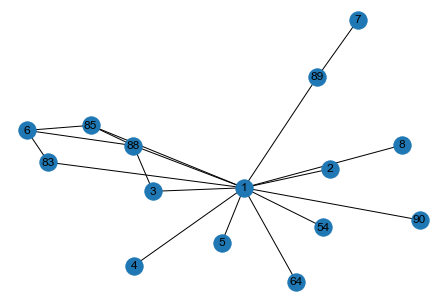

*********************************
Graph for phase: 2


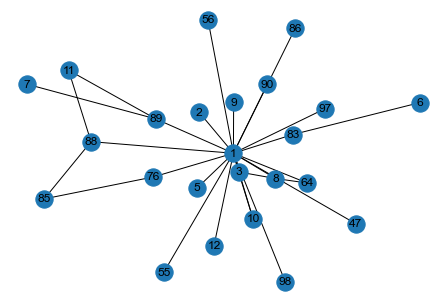

*********************************
Graph for phase: 3


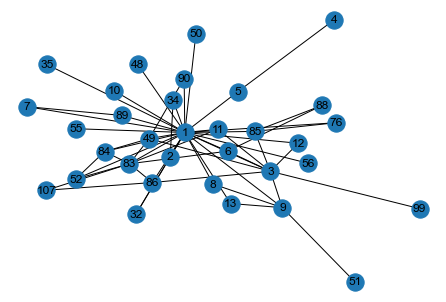

*********************************
Graph for phase: 4


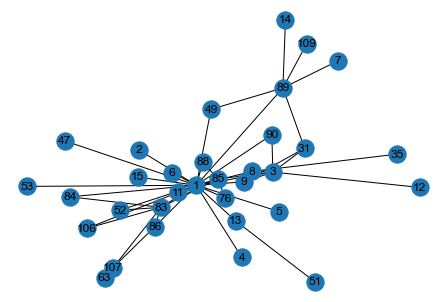

*********************************
Graph for phase: 5


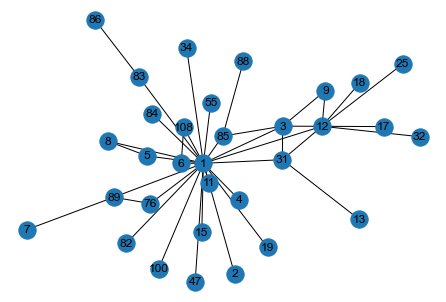

*********************************
Graph for phase: 6


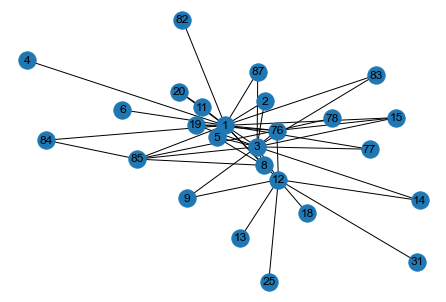

*********************************
Graph for phase: 7


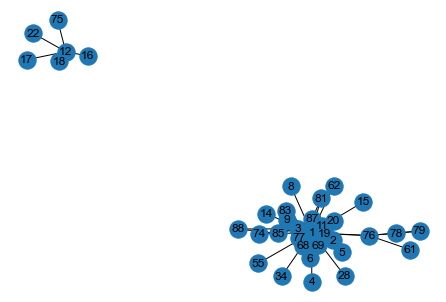

*********************************
Graph for phase: 8


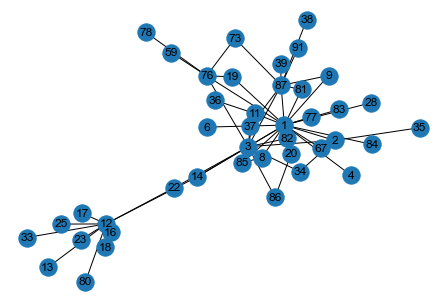

*********************************
Graph for phase: 9


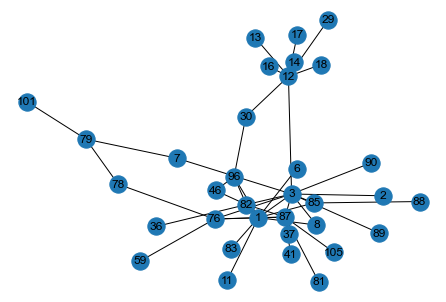

*********************************
Graph for phase: 10


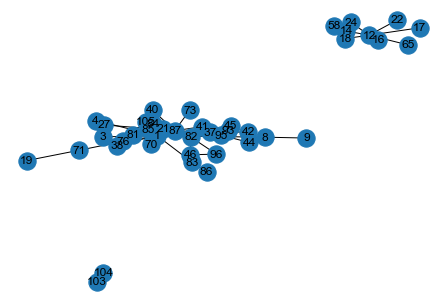

*********************************
Graph for phase: 11


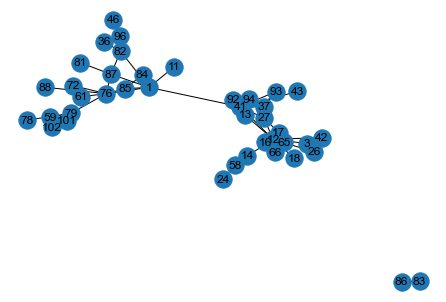

In [13]:
for i, g in enumerate(graphs):
    print("*********************************")
    
    print("Graph for phase:", i + 1)
    
    nx.draw(g, with_labels = True)
    
    
    
    plt.show()

In [14]:
deg_cen={}
for g in graphs:
    deg_cen[g]=nx.degree_centrality(g)
deg_cen

{<networkx.classes.graph.Graph at 0x205ea3ebbe0>: {5: 0.07142857142857142,
  83: 0.14285714285714285,
  3: 0.14285714285714285,
  4: 0.07142857142857142,
  1: 0.8571428571428571,
  89: 0.14285714285714285,
  2: 0.07142857142857142,
  85: 0.21428571428571427,
  7: 0.07142857142857142,
  54: 0.07142857142857142,
  88: 0.2857142857142857,
  6: 0.21428571428571427,
  64: 0.07142857142857142,
  90: 0.07142857142857142,
  8: 0.07142857142857142},
 <networkx.classes.graph.Graph at 0x205ee0cc3a0>: {3: 0.13043478260869565,
  89: 0.13043478260869565,
  1: 0.8260869565217391,
  88: 0.13043478260869565,
  5: 0.043478260869565216,
  86: 0.043478260869565216,
  8: 0.13043478260869565,
  55: 0.043478260869565216,
  90: 0.043478260869565216,
  7: 0.043478260869565216,
  10: 0.08695652173913043,
  56: 0.043478260869565216,
  97: 0.043478260869565216,
  47: 0.043478260869565216,
  98: 0.043478260869565216,
  76: 0.08695652173913043,
  83: 0.08695652173913043,
  2: 0.043478260869565216,
  9: 0.0434782608

In [15]:
eig_cen={}
for p in graphs:
    eig_cen[g]=nx.eigenvector_centrality(g)
btw_cen={}
for p in graphs:
    btw_cen[g]=nx.betweenness_centrality(g)
clo_cen={}
for p in graphs:
    clo_cen[g]=nx.closeness_centrality(g)
btw_cen

{<networkx.classes.graph.Graph at 0x205ee0cce80>: {24: 0.0,
  83: 0.0,
  1: 0.5262820512820513,
  88: 0.0,
  3: 0.0,
  85: 0.0057692307692307696,
  86: 0.0,
  76: 0.33205128205128204,
  82: 0.1371794871794872,
  14: 0.09230769230769231,
  11: 0.0,
  84: 0.0,
  79: 0.17884615384615385,
  17: 0.0,
  13: 0.0,
  61: 0.0,
  18: 0.0,
  12: 0.42991452991452994,
  78: 0.0,
  87: 0.07051282051282051,
  16: 0.0,
  81: 0.0,
  59: 0.0,
  94: 0.0,
  37: 0.0010683760683760683,
  96: 0.047435897435897434,
  26: 0.0,
  36: 0.0,
  58: 0.047435897435897434,
  101: 0.0,
  41: 0.554059829059829,
  46: 0.0,
  27: 0.023931623931623933,
  93: 0.0,
  42: 0.0,
  43: 0.0,
  102: 0.000641025641025641,
  72: 0.0,
  92: 0.0,
  66: 0.0,
  65: 0.0}}

In [16]:
for ix, g in enumerate(graphs):
    temp_dict = {}
    for w in sorted(deg_cen[g], key = deg_cen[g].get, reverse = True):
        temp_dict[w] = deg_cen[g][w]
    print("Sorted importance of nodes in terms of deg_cen for Phase {} is {}".format(ix + 1, list(temp_dict.keys())[:5]))
    print()

Sorted importance of nodes in terms of deg_cen for Phase 1 is [1, 88, 85, 6, 83]

Sorted importance of nodes in terms of deg_cen for Phase 2 is [1, 3, 89, 88, 8]

Sorted importance of nodes in terms of deg_cen for Phase 3 is [1, 3, 83, 9, 49]

Sorted importance of nodes in terms of deg_cen for Phase 4 is [1, 83, 3, 89, 85]

Sorted importance of nodes in terms of deg_cen for Phase 5 is [1, 12, 3, 31, 85]

Sorted importance of nodes in terms of deg_cen for Phase 6 is [1, 3, 12, 76, 85]

Sorted importance of nodes in terms of deg_cen for Phase 7 is [1, 3, 76, 12, 85]

Sorted importance of nodes in terms of deg_cen for Phase 8 is [1, 3, 12, 87, 76]

Sorted importance of nodes in terms of deg_cen for Phase 9 is [3, 1, 12, 87, 82]

Sorted importance of nodes in terms of deg_cen for Phase 10 is [1, 87, 37, 12, 82]

Sorted importance of nodes in terms of deg_cen for Phase 11 is [12, 41, 1, 76, 79]



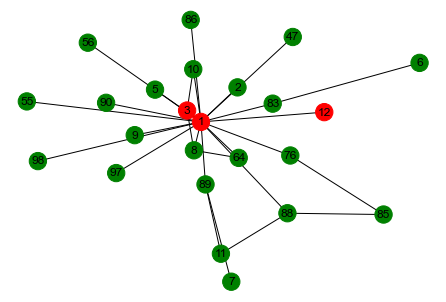

In [23]:
graph2 = nx.from_pandas_adjacency(P2)

color = []

for node in graph2:
    if (node == 1 or node == 12  or node == 3):
        color.append('red')
    else:
        color.append('green')

nx.draw_spring(graph2, node_color = color, with_labels = True)